<a href="https://colab.research.google.com/github/jaisonjames0006/ML/blob/main/Project_1_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **MOVIE RECOMMENDATION SYSTEM**

It is a system that recommend similar movies with respect to the input given by the user. The recommendation is  based on various parameters such as genres, tagline, cast, director etc 

systems produce a list of recommendations in any of the two ways – 
 
*Collaborative filtering*: Collaborative filtering approaches build a model from the user’s past behavior as well as similar decisions made by other users. This model is then used to predict items that users may have an interest in.

*Content-based filtering*: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on the user’s past preferences.

Here iam going to discuss about a basic recommendation system by suggesting movies that are most similar to input movie.

### **IMPORT NECESSARY PYTHON LIBRARIES**

In [141]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import warnings
warnings. filterwarnings("ignore")

### **DATA COLLECTION AND PRE-PROCESSING**



In [142]:
# loading the data from the csv file to a pandas dataframe

df_movies = pd.read_csv('/content/drive/MyDrive/movies.csv')

In [143]:
df_movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [144]:
# number of rows and columns in the data frame

df_movies.shape

(4803, 24)

In [145]:
# Extract the year from the release date column

df_movies['release_date']
import datetime
df_movies['year'] = pd.DatetimeIndex(df_movies['release_date']).year
df= df_movies.sort_values(by=['year'], ascending=False)

Text(0.5, 1.0, 'Year Count')

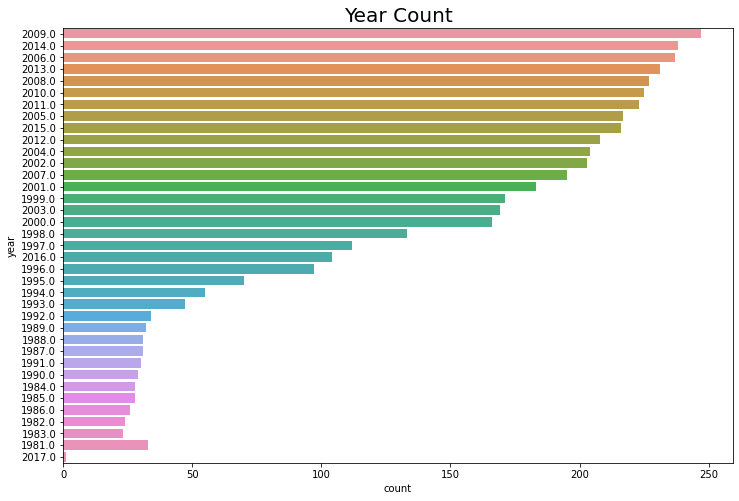

In [146]:
# plot the year count of the data 

plt.figure(figsize=(12,8))
sns.countplot(y='year',data=df,order=df['year'][:4500].value_counts(ascending=False).index)
plt.title('Year Count',fontsize=20)

Text(0.5, 1.0, 'Budget v/s Revenue')

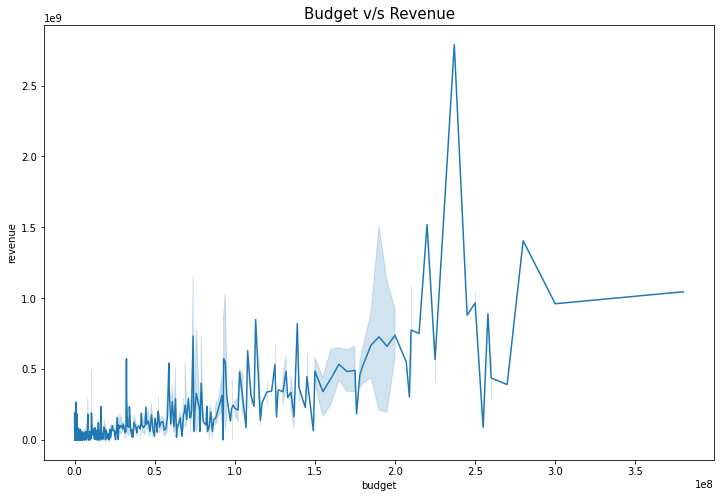

In [147]:
# Plot the Budget vs Revenue graph

plt.figure(figsize=(12,8))
sns.lineplot(df_movies['budget'],df_movies['revenue'])
plt.title('Budget v/s Revenue',fontsize=15)

Text(0.5, 1.0, 'Language count')

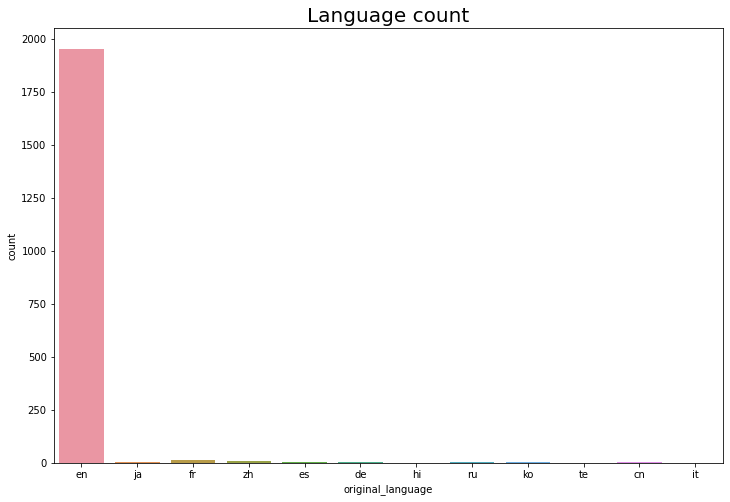

In [148]:
# Plot the language count

plt.figure(figsize=(12,8))
sns.countplot(df_movies['original_language'][:2000])
plt.title('Language count',fontsize=20)

In [149]:
# Director count

df_movies['director'].value_counts()[:20]

Steven Spielberg        27
Woody Allen             21
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            16
Spike Lee               16
Robert Rodriguez        16
Steven Soderbergh       15
Renny Harlin            15
Oliver Stone            14
Tim Burton              14
Robert Zemeckis         13
Joel Schumacher         13
Barry Levinson          13
Ron Howard              13
Tony Scott              12
Brian De Palma          12
Kevin Smith             12
Francis Ford Coppola    12
Michael Bay             12
Name: director, dtype: int64

In [150]:
# Info about the data frame

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [151]:
# check the missing values in the data frame

df_movies.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
year                       1
dtype: int64

In [152]:
# Print the columns in the data frame

df_movies.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director', 'year'],
      dtype='object')

In [153]:
# Selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','crew','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'crew', 'director']


In [154]:
# Replacing the null values with null string

for feature in selected_features:
  df_movies[feature] = df_movies[feature].fillna('')

In [155]:
# Combining all the 6 selected features

combined_features = df_movies['genres']+' '+df_movies['keywords']+' '+df_movies['tagline']+' '+df_movies['cast']+' '+df_movies['crew']+' '+ df_movies['director']

In [156]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [157]:
# Remove special charateres in the combined_feature

combined_features=combined_features.str.replace('[^a-zA-Z0-9]+',' ')

In [158]:
# Apply stemming and tokenize the combined_features

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
from nltk import TreebankWordTokenizer
tk=TreebankWordTokenizer()
combined_features=combined_features.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [159]:
# Remove stopwords from the combined_features

from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
combined_features=combined_features.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
# Converting the text data to feature vectors

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 29019)	0.015763269045915466
  (0, 143280)	0.015763269045915466
  (0, 221799)	0.015763269045915466
  (0, 206944)	0.012404260639394139
  (0, 20863)	0.015763269045915466
  (0, 113856)	0.015763269045915466
  (0, 185712)	0.006080159398155373
  (0, 20862)	0.015035649042320392
  (0, 113855)	0.015763269045915466
  (0, 221420)	0.015035649042320392
  (0, 20861)	0.015763269045915466
  (0, 113854)	0.015763269045915466
  (0, 217507)	0.015763269045915466
  (0, 20860)	0.015035649042320392
  (0, 113852)	0.015763269045915466
  (0, 212051)	0.015035649042320392
  (0, 210396)	0.008539647695733083
  (0, 20859)	0.015763269045915466
  (0, 113850)	0.015763269045915466
  (0, 208374)	0.015763269045915466
  (0, 214714)	0.012404260639394139
  (0, 20858)	0.015763269045915466
  (0, 113847)	0.015763269045915466
  (0, 206533)	0.014118956249849794
  (0, 205757)	0.011230768841825159
  :	:
  (4802, 208917)	0.11162553104298434
  (4802, 192702)	0.09423145954054306
  (4802, 210287)	0.10263904464530765
  (4802, 190297

### **COSINE SIMILARITY**

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.
Similarity = (A.B) / (||A||.||B||) where A and B are vectors.

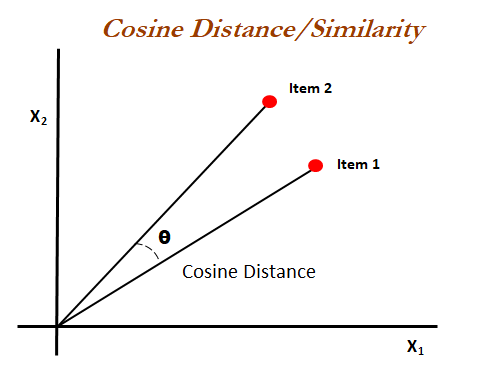

In [161]:
Image.open('/content/drive/MyDrive/aa.png')

In [162]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [163]:
print(similarity)

[[1.         0.66549653 0.86774838 ... 0.45189782 0.11535331 0.26468124]
 [0.66549653 1.         0.67150881 ... 0.41085545 0.10300519 0.23866677]
 [0.86774838 0.67150881 1.         ... 0.46719673 0.12434    0.26894947]
 ...
 [0.45189782 0.41085545 0.46719673 ... 1.         0.07409903 0.17810358]
 [0.11535331 0.10300519 0.12434    ... 0.07409903 1.         0.0450271 ]
 [0.26468124 0.23866677 0.26894947 ... 0.17810358 0.0450271  1.        ]]


In [164]:
print(similarity.shape)

(4803, 4803)


### **GET INPUT MOVIE FROM THE USER**

In [165]:

input_movie = input(' Enter your favourite movie : ')

 Enter your favourite movie : superman


In [166]:
# creating a list with all the movie names given in the dataset

titles = df_movies['title'].tolist()
print(titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

### **Find the close match**

The **dfflib** Python module includes various features to evaluate the comparison of sequences, it can be used to compare files, and it can create information about file variations in different formats, including HTML and context and unified diffs.

**get_close_matches() method**: This method returns the best character or group of character matches column. The term is a sequence in which close similarities are needed (usually a string) and possibilities are a set of sequences for matching terms (mostly a list of strings)

In [167]:
# finding the close match for the input movie

find_close_match = difflib.get_close_matches(input_movie, titles)
print(find_close_match)

['Superman', 'Superman II', 'Superman III']


In [168]:
# Short the close matches to a single value

close_match = find_close_match[0]
print(close_match)

Superman


In [169]:
# finding the index of the movie with title

index_of_the_movie = df_movies[df_movies.title == close_match]['index'].values[0]
print(index_of_the_movie)

813


In [170]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.5354532088628264), (1, 0.4842366476733361), (2, 0.5508263591502168), (3, 0.5779130841788933), (4, 0.556104649304764), (5, 0.5204650925166356), (6, 0.4973439926708142), (7, 0.5494999601541467), (8, 0.4599726855571004), (9, 0.5739656968825976), (10, 0.4823183291450357), (11, 0.4216920147369562), (12, 0.43998630481568446), (13, 0.47689184686203806), (14, 0.5444745851083489), (15, 0.5494339420614364), (16, 0.5341725613436535), (17, 0.4972310015799931), (18, 0.440877489109658), (19, 0.5506669777236014), (20, 0.5384067148023742), (21, 0.4030194478541856), (22, 0.548981456031242), (23, 0.4782870335809555), (24, 0.4817734198017544), (25, 0.5187307737932247), (26, 0.5553157201271725), (27, 0.5437094554923356), (28, 0.5738622227826493), (29, 0.4872760113101944), (30, 0.5695532401455796), (31, 0.4768380422957722), (32, 0.4531817743512819), (33, 0.5151030538214534), (34, 0.3685279594138788), (35, 0.5299366991241111), (36, 0.5313998600357791), (37, 0.46666817236721203), (38, 0.55704895235565

In [171]:
len(similarity_score)

4803

In [172]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(813, 1.0000000000000002), (870, 0.6422777065812102), (186, 0.5828031930125507), (303, 0.5799620447322864), (182, 0.5784758571420539), (93, 0.5782683546604243), (275, 0.5781097659758767), (3, 0.5779130841788933), (386, 0.5768214136030275), (165, 0.5767242689795553), (112, 0.5766511890927271), (408, 0.5763117127694293), (150, 0.5762122755849929), (185, 0.5758094665198428), (164, 0.5756957553980446), (320, 0.5754588208147922), (483, 0.5746550871515911), (673, 0.5745961080657198), (171, 0.5744879256254074), (412, 0.5741981051245177), (191, 0.5740019864257229), (9, 0.5739656968825976), (90, 0.573941662204782), (28, 0.5738622227826493), (338, 0.5738136101770198), (298, 0.573757534270391), (119, 0.573507514258223), (223, 0.5734925728928313), (505, 0.5734409802810168), (529, 0.573244414233765), (654, 0.573208874110368), (197, 0.573007878878888), (1430, 0.5729927151709465), (828, 0.5726156632327051), (363, 0.5723399936609965), (724, 0.572062968089259), (726, 0.5718540142134525), (263, 0.57180

In [173]:
# print the name of similar movies based on the index

print('Suggestions for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df_movies[df_movies.index==index]['title'].values[0]
  if (i<21):
    print(i, '.',title_from_index)
    i+=1

Suggestions for you : 

1 . Superman
2 . Superman II
3 . Bad Boys II
4 . Catwoman
5 . Ant-Man
6 . Terminator 3: Rise of the Machines
7 . Minority Report
8 . The Dark Knight Rises
9 . The Bourne Supremacy
10 . Hulk
11 . Alexander
12 . Collateral Damage
13 . Men in Black II
14 . War of the Worlds
15 . Lethal Weapon 4
16 . Black Hawk Down
17 . Timeline
18 . Austin Powers in Goldmember
19 . Master and Commander: The Far Side of the World
20 . The Core
